# Kaggle Challenge assignment **

This project aims to predict the Titanic spaceship dataset and submit the result to kaggle to obtain a score

# 1) Importing required modules and  Loading the  data



In [1]:
# Importing the required modules
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [2]:
# Importing the training data
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Importing the test data
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# 2) Exploring the data to better understand its properties and features

In [4]:
# Checking the information of the Titanic spaceship dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


From the information above, we can see that we are dealing with a dataset with 8693 rows and 14 columns. Also, we can deduce that the dataset contains missing values in each column except for the PassengerId  and Transported column. We can also see we have 3 types of data  (numerical, categorical and bool)

In [5]:
# Checking basic statistical properties of the numerical varaibles in the data
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the descriptive numerical statistics, as seen in the wide difference between the mean and the standard deviation , we can deduce that our columns contains extreme values, making the variables skewed

In [6]:
# Checking the statistical properties of the categorical varaibles in the data
train.describe(include=[object])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


From the categorical statistical properties, we can see that the PassengerId, Cabin, and Name variables conatins high volume of unique values and therefore will be dropped later on when preprocessing and preparing the data

In [7]:
# Checking for duplicates in the dataset
train.duplicated().sum()


0

We can see that we have no duplicates in our datasets with the 0 values

In [8]:
# Checking for missing
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can deduce from the above that we have missing values in the dataset which will be address later in the preprocessing aspect of this project

<Axes: >

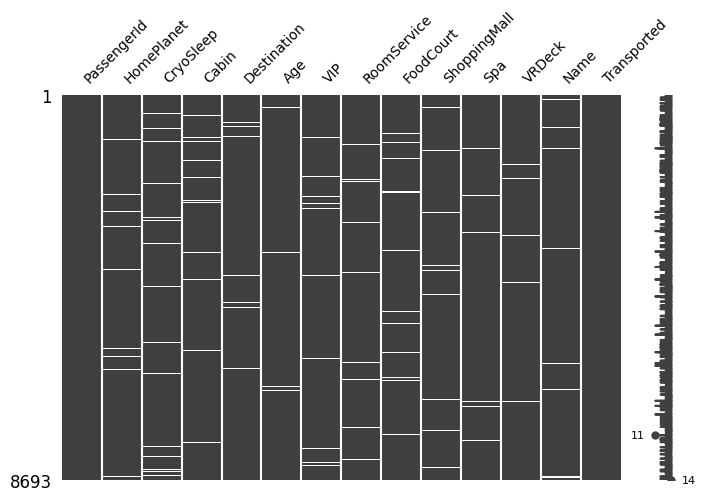

In [9]:
# Visualising the missing values for better insights and understanding

# Show missing values:
msno.matrix(train,figsize=(8,5),fontsize=10)

# 2) Exploratory Data Analysis (EDA):

Next step after gaining better understanding of our data, we will begin the EDA process to gain insights into our variables and our target class.

We will break our EDA in 3 aspects namely:

***Univariate Analysis***: Analyzes a single variable to summarize and find patterns in the data.

**Bivariate Analysis**: *italicized text* Examines the relationship between two variables (independent and the dependent variable) to understand correlations and interactions between them.

***Multivariate Analysis***: Investigates more than two variables simultaneously to understand complex relationships and dynamics within the data

# Univariate Analysis:

Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

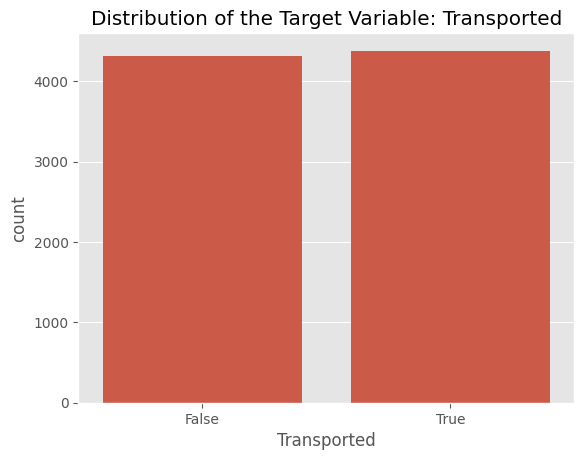

In [10]:
# Checking the distribution of the target variable
plt.style.use('ggplot')
sns.countplot(x='Transported', data=train).set_title('Distribution of the Target Variable: Transported')
train['Transported'].value_counts(normalize=True) * 100

From the above graph, we can deduce that we have a fairly balanced data hence, we dont need to apply smote method to balance the data

Text(0.5, 1.0, 'Distribution of Numerical Columns')

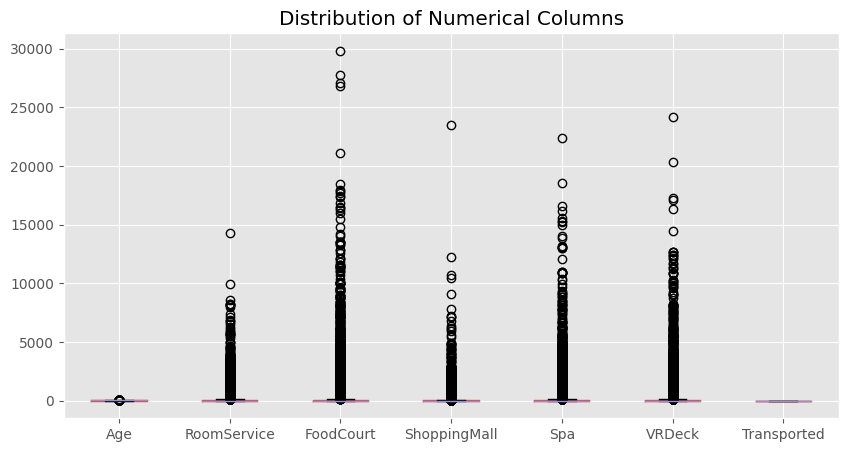

In [11]:
# Checking the distribution of the numerical variables using a box plot
train.boxplot(figsize=(10, 5)).set_title('Distribution of Numerical Columns')


From the graph, we can deduce that extreme values are present in our data, indicating a skewed distribution for expenditure variables like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck, whereas the Age and Transported variable shows a more uniform distribution without significant skewness.

Text(0.5, 1.0, '"Distribution of Age by Age Brackets"')

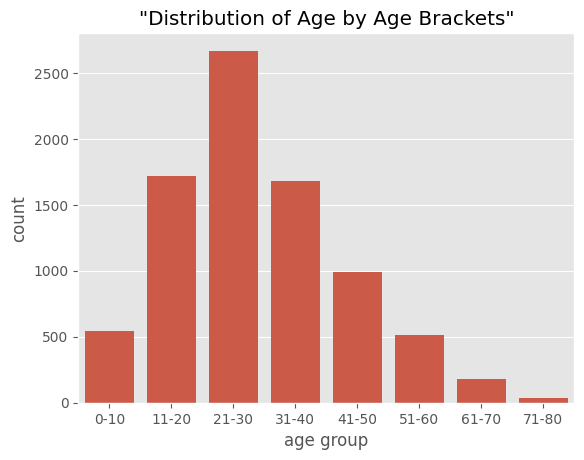

In [12]:
# Feature Engineering to age variable to plot the distibution with respect to various age brackets

# Creating  bins to start from 0 and end at 79 (min and max age in the data),
train['age group'] = pd.cut(train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Plotting the distribution of age brackets
sns.countplot(x='age group', data=train).set_title('"Distribution of Age by Age Brackets"')


The bar chart shows that in the spaceship, the 21-30 age group has the highest number of individuals, followed by the 11-20 and 31-40 age groups, with fewer individuals in the older age brackets beyond 40.

# Bivariate Analysis

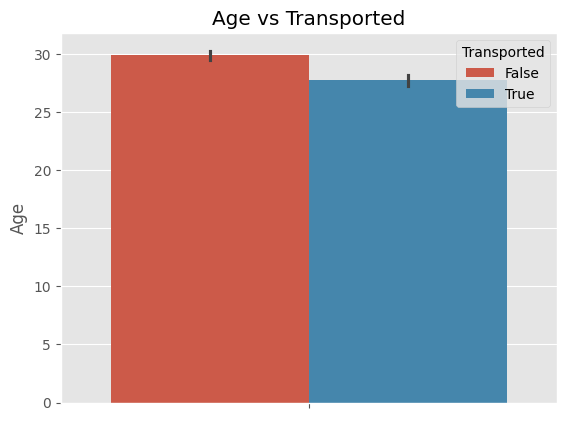

In [13]:
# Plotting the Age distribution relationship with the 'Transported' status
sns.barplot(hue='Transported', y='Age', data=train).set_title(('Age vs Transported'))
plt.show()

The chart above reveals that the average age of those who were transported is slightly lower than those who were not transported, indicating that younger passengers had a marginally higher likelihood of being transported.

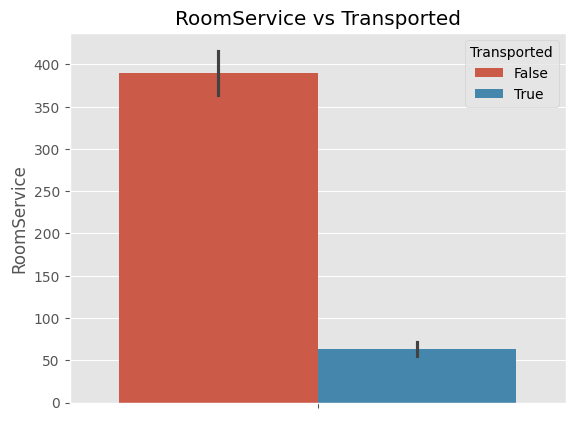

In [14]:
# Plotting the relationship between RoomService and  'Transported' status
sns.barplot( y='RoomService',hue='Transported', data=train).set_title(('RoomService vs Transported'))
plt.show()

The chart above reveals that the average amount spent on room service is significantly higher for individuals who were not transported compared to those who were transported. This indicates that passengers who spent more on room service had a lower likelihood of being transported.

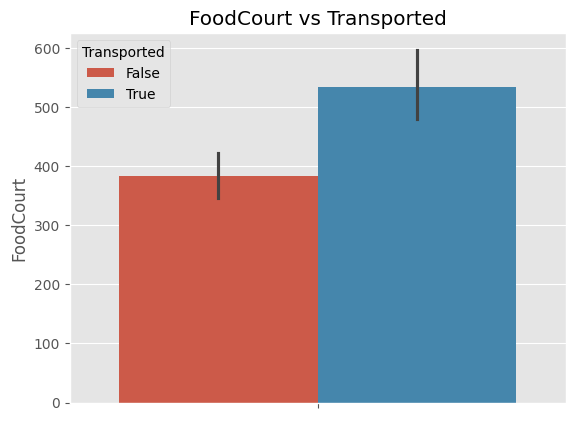

In [15]:
# Plotting the relationship between FoodCourt and  'Transported' status
sns.barplot( y='FoodCourt',hue='Transported', data=train).set_title(('FoodCourt vs Transported'))
plt.show()

The chart reveals that the average amount spent in the Food Court is higher for individuals who were transported compared to those who were not transported. This suggests that passengers who spent more in the Food Court had a higher likelihood of being transported.

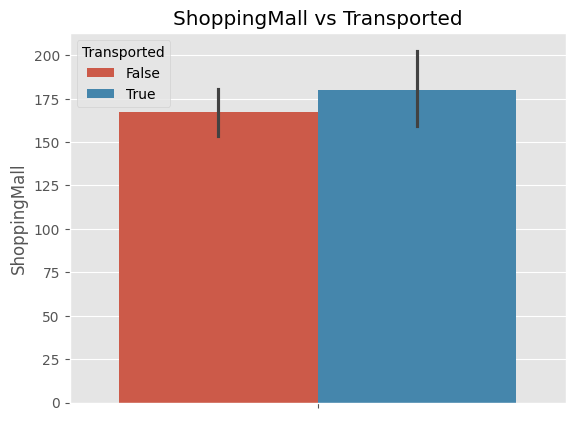

In [16]:
# Plotting the relationship between ShoppingMall and  'Transported' status
sns.barplot( y='ShoppingMall',hue='Transported', data=train).set_title(('ShoppingMall vs Transported'))
plt.show()

The chart shows that the average spending in the Shopping Mall is slightly higher for individuals who were transported compared to those who were not transported. This suggests that passengers who spent slightly more in the Shopping Mall had a marginally higher likelihood of being transported.

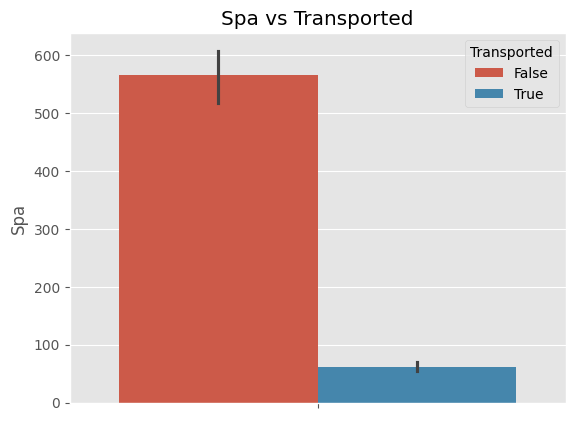

In [17]:
# Plotting the relationship between Spa and  'Transported' status
sns.barplot( y='Spa',hue='Transported', data=train).set_title(('Spa vs Transported'))
plt.show()

The chart reveals that the average spending on spa services is significantly higher for individuals who were not transported compared to those who were transported. This suggests that passengers who spent more on spa services had a lower likelihood of being transported.

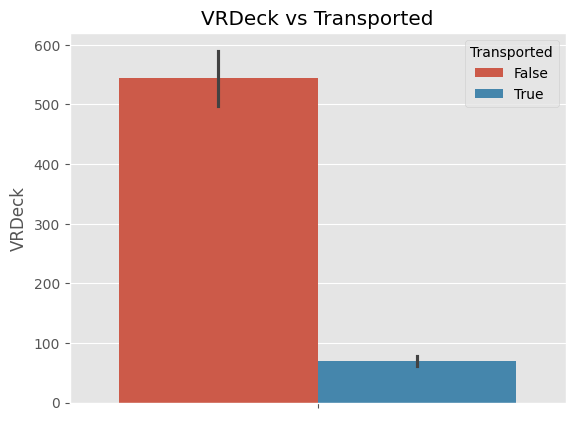

In [18]:
# Plotting the relationship between VRDeck and  'Transported' status
sns.barplot( y='VRDeck',hue='Transported', data=train).set_title(('VRDeck vs Transported'))
plt.show()


The chart reveals that the average spending on the VRDeck is significantly higher for individuals who were not transported compared to those who were transported. This suggests that passengers who spent more on VRDeck activities had a lower likelihood of being transported.

# Multivariate Analysis

In [19]:
# Correlation matrix
# Calculate the correlation matrix
corr_matrix = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr()
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<Axes: >

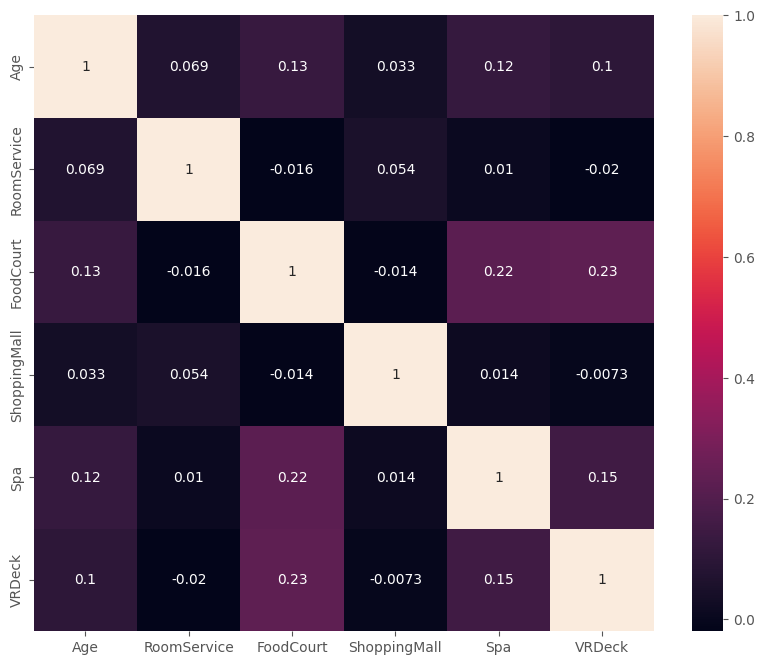

In [20]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

The heatmap reveals that most features have weak correlations with each other, except for some moderate positive correlations among FoodCourt, Spa, and VRDeck expenditures. This suggests that passengers who spend more in one of these areas tend to spend more in the others as well. Age and RoomService, on the other hand, show weak or negligible correlations with other features.

# 4) Preprocessing

Next, we will begin preprocessing and preparing the data based on the insights and the undertstanding of our data to make it suitable for our Model

In [21]:
# Adressing  Missing Values
train.dropna(inplace=True)
print(train.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
age group       0
dtype: int64


As seen above, we have no missing values in our data

In [22]:
# Dropping reduntant in the data
train.drop(['Name', 'Cabin', 'PassengerId', 'age group'], axis=1, inplace=True)

We have drop columns we wont be needing in our machine learning model

Text(0.5, 1.0, 'Distribution of Numerical Columns after Transformation')

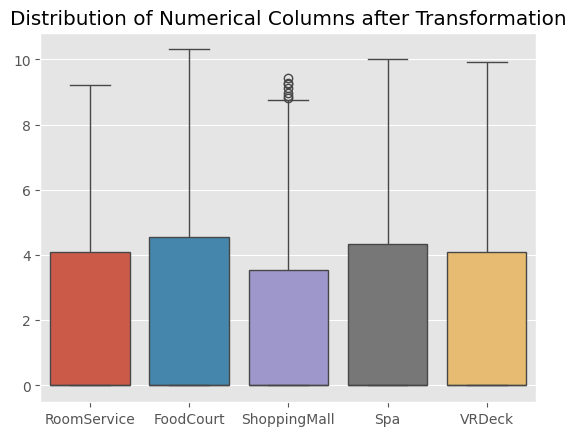

In [23]:
# Applying Log transformation to addressing Extreme values in our numerical variables

# Numerical columns to be transformed
numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Apply log transformation to numerical columns directly on the original DataFrame
for col in numerical_cols:
    train[col] = np.log1p(train[col])

# Checkin the distribution of numerical columns after transformation using box plots
sns.boxplot(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]).set_title('Distribution of Numerical Columns after Transformation')

From the above, we can deduce that the log transformation significantly reduces the impact of extreme values, resulting in more uniform distributions with shorter whiskers and more centered boxes in the box plots. This transformation helps make the data more normally distributed, improving interpretability and the performance of machine learning algorithms.

In [24]:
# Encoding the categorical features using pd.get_dummies

# Defining the categorical columns
categoric=['HomePlanet', 'CryoSleep', 'Destination',	'VIP']
train_encoded=pd.get_dummies(train, columns=categoric, drop_first=True )
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

train_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
1,24.0,4.700480,2.302585,3.258097,6.309918,3.806662,1,0,0,0,0,1,0
2,58.0,3.784190,8.182280,0.000000,8.812248,3.912023,0,1,0,0,0,1,1
3,33.0,0.000000,7.157735,5.918894,8.110728,5.267858,0,1,0,0,0,1,0
4,16.0,5.717028,4.262680,5.023881,6.338594,1.098612,1,0,0,0,0,1,0


We have encoded or categorical columns in 1s and 0s

In [25]:
# Defining Our Dependent and Independent variable
X=train_encoded.drop('Transported' , axis=1)
y=train_encoded['Transported']

 We have now splitted our data into dependent and independent variable

In [26]:
# splitting the data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)


We have now defined our training data to be 80% of the data and testing data to be 20% of the data

In [27]:
# Normalizing the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

# 5) Modelling

Here, We will train & test the ML model. We will be employing the Decision Tree Algorithim to build our model.

In [28]:
# instantiating the Decision Tree Model to build the model
model=DecisionTreeClassifier(random_state=42)

# Fitting the Model to the training data
model.fit(X_train_scaled,y_train)

# Checking how well the model learnt the data
train_data_accuracy=model.score(X_train_scaled,y_train)

print(train_data_accuracy * 100)

93.96751740139212


The training performance of our model is 93.96%

In [29]:
# Testing the Model performance on the test data
# Making
test_prediction =model.predict(X_test_scaled)

# Evaluating the model prediction on test data
test_data_accuracy=metrics.accuracy_score(y_test, test_prediction)

# Checking how well the model learnt the data
print(test_data_accuracy)


0.7557959814528593


Our Test performance 75.57% is way below the performance of the training data, meaning that our model is overfitting and not performing optimally. To rectify this and increase our test performance, we will employ hyperparameter tuning


# Hyperparameter tuning

Employing the gridsearch hyperparameter for a comphrensive model parameter tuning

In [30]:
# Define the expanded parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [31]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 50],
                         'splitter': ['best', 'random']},
             verbose=1)

In [32]:
# Checking how well the gridsearch performed
grid_search.score(X_train_scaled, y_train) *100

81.67053364269141

In [33]:
# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 50, 'splitter': 'best'}


In [34]:
# Make Predictions on the Test Data:
y_pred = grid_search.predict(X_test_scaled)

# Checking the performance of the gridsearch on the test dat
grid_accuracy = metrics.accuracy_score(y_test, y_pred)

print(grid_accuracy *100)

79.05718701700154


In [35]:
# Model Evaluation Using Classification Report
class_report = metrics.classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       651
           1       0.80      0.77      0.79       643

    accuracy                           0.79      1294
   macro avg       0.79      0.79      0.79      1294
weighted avg       0.79      0.79      0.79      1294



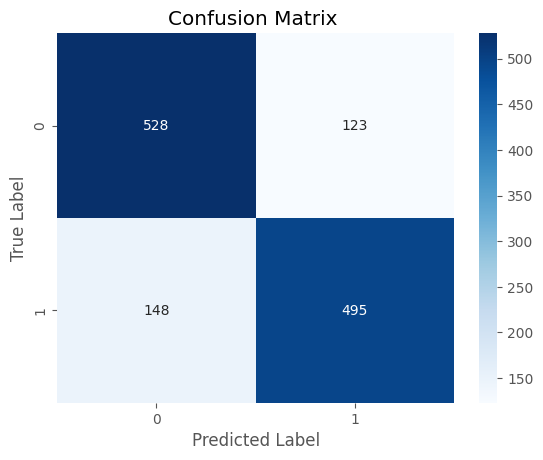

In [36]:
# Model Evaluation Using Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5) Analysis & XAI

Since the Model we used Decison Tree is in itself an Explainable Machine Learning method, We will apply its feature feature importance methodology to find the most important feature in predicting the target variable



In [37]:
# Get feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

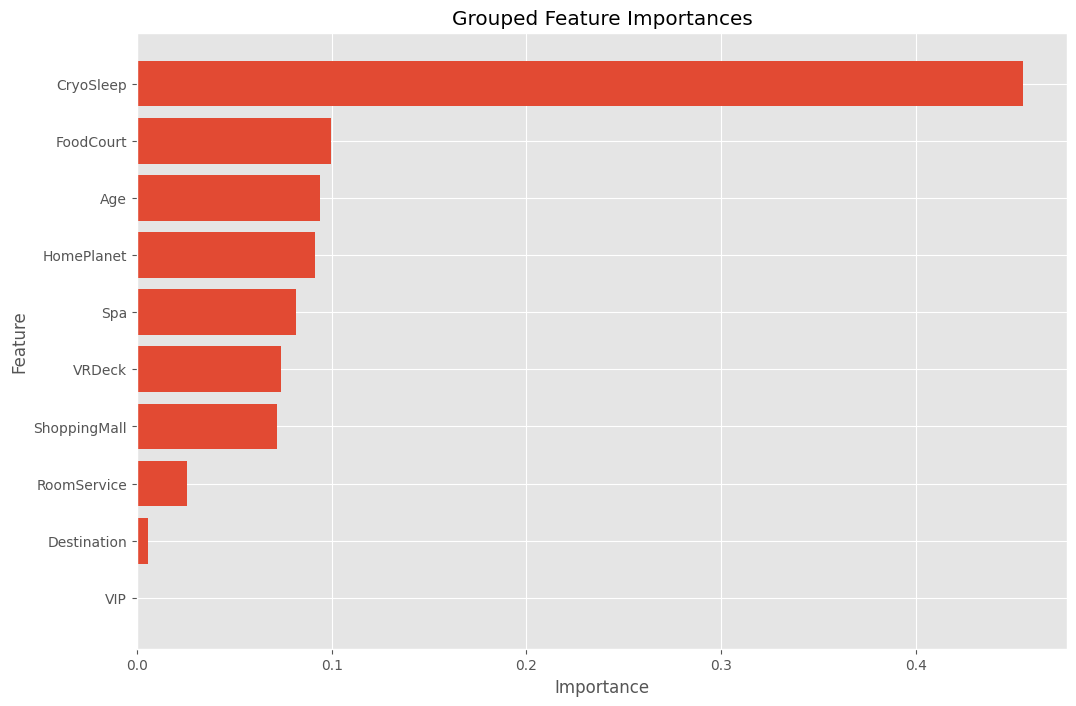

In [38]:
# Group by the original categorical feature names
grouped_importance_df = feature_importance_df.copy()
grouped_importance_df['Feature'] = grouped_importance_df['Feature'].replace({
    col: 'HomePlanet' for col in X.columns if col.startswith('HomePlanet_')
}).replace({
    col: 'CryoSleep' for col in X.columns if col.startswith('CryoSleep_')
}).replace({
    col: 'Destination' for col in X.columns if col.startswith('Destination_')
}).replace({
    col: 'VIP' for col in X.columns if col.startswith('VIP_')
})

grouped_importance_df = grouped_importance_df.groupby('Feature').sum().reset_index()

# Sort the DataFrame by importance
grouped_importance_df = grouped_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(grouped_importance_df['Feature'], grouped_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Grouped Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()




In [39]:
# Print the grouped feature importances
print(grouped_importance_df)

        Feature  Importance
1     CryoSleep    0.454780
3     FoodCourt    0.099724
0           Age    0.094255
4    HomePlanet    0.091334
7           Spa    0.081674
9        VRDeck    0.074192
6  ShoppingMall    0.072110
5   RoomService    0.025916
2   Destination    0.005902
8           VIP    0.000112


# 6) Prepare predicitons for submission

Here,  we will predict on the kaggle test data and extract the results needed for the submission to Kaggle.

In [40]:
# Viewing the kaggle test data
test_df = test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Applying all preprocessing steps on the Kaggle test data

In [41]:
# Checking Missing Values
print(test_df.isna().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [42]:
# Adressing  Missing Values
test_df.dropna(inplace=True)

In [43]:
# Keep the PassengerId for submission
passenger_ids = test_df['PassengerId']

In [44]:
# Drop unnecessary columns in test data
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [45]:
# Applying Log transformation to addressing Extreme values in our numerical variables

# Numerical columns to be transformed
numerical_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Apply log transformation to numerical columns directly on the original DataFrame
for col in numerical_cols:
    test_df[col] = np.log1p(test_df[col])

In [46]:
# Apply one-hot encoding using pd.get_dummies
test_df_encoded = pd.get_dummies(test_df, columns=categoric, drop_first=True)


In [47]:
# Scale numerical columns
test_df_scaled = scaler.transform(test_df_encoded)

In [48]:
# Make predictions on the test data
predictions = grid_search.best_estimator_.predict(test_df_scaled)


In [49]:
# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predictions
})

In [50]:
# Replace numerical predictions with boolean
submission_df['Transported'] = submission_df['Transported'].replace({1: True, 0: False})



In [51]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('kaggle_submission.csv', index=False)

# Display the first few rows of the submission file for verification
print(submission_df.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [52]:
# Downloading the data
from google.colab import files

# Download the saved CSV file
files.download('kaggle_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>